MAP REDUCE CONCEPT

In [ ]:
from functools import reduce

In [2]:
# Sample data: a list of sentences
sentences = [
    "Map Reduce is simple",
    "Map Reduce is powerful",
    "Map Reduce is used for big data"
]

# Step 1: MAP phase (split sentences into words and map each word to (word,1))
mapped = []
for sentence in sentences:
    for word in sentence.split():
        mapped.append((word.lower(), 1))

print("Mapped Output:")
print(mapped)

# Step 2: SHUFFLE phase (group by keys/words)
shuffle = {}
for word, count in mapped:
    if word not in shuffle:
        shuffle[word] = []
    shuffle[word].append(count)

print("\nShuffled Output:")
print(shuffle)

# Step 3: REDUCE phase (sum values for each word)
reduced = {}
for word, counts in shuffle.items():
    reduced[word] = reduce(lambda x, y: x + y, counts)

print("\nReduced Output (Final Word Count):")
print(reduced)

Mapped Output:
[('map', 1), ('reduce', 1), ('is', 1), ('simple', 1), ('map', 1), ('reduce', 1), ('is', 1), ('powerful', 1), ('map', 1), ('reduce', 1), ('is', 1), ('used', 1), ('for', 1), ('big', 1), ('data', 1)]

Shuffled Output:
{'map': [1, 1, 1], 'reduce': [1, 1, 1], 'is': [1, 1, 1], 'simple': [1], 'powerful': [1], 'used': [1], 'for': [1], 'big': [1], 'data': [1]}

Reduced Output (Final Word Count):
{'map': 3, 'reduce': 3, 'is': 3, 'simple': 1, 'powerful': 1, 'used': 1, 'for': 1, 'big': 1, 'data': 1}


In [3]:
from collections import defaultdict
from functools import reduce

# Sample data: list of sentences
sentences = [
    "data science is fun",
    "big data is powerful",
    "map reduce is used for data science"
]

# Step 1: MAP phase
# Generate co-occurrence pairs (word1, word2) for each sentence
mapped = []
for sentence in sentences:
    words = sentence.split()
    for i in range(len(words)):
        for j in range(len(words)):
            if i != j:  # avoid self-pair (word, word)
                mapped.append(((words[i], words[j]), 1))

print("Mapped Output:")
print(mapped)

# Step 2: SHUFFLE phase (group pairs)
shuffle = defaultdict(list)
for pair, count in mapped:
    shuffle[pair].append(count)

print("\nShuffled Output:")
print(dict(shuffle))

# Step 3: REDUCE phase (sum counts for each pair)
reduced = {}
for pair, counts in shuffle.items():
    reduced[pair] = reduce(lambda x, y: x + y, counts)

print("\nReduced Output (Word Co-occurrences):")
for pair, count in reduced.items():
    print(pair, ":", count)


Mapped Output:
[(('data', 'science'), 1), (('data', 'is'), 1), (('data', 'fun'), 1), (('science', 'data'), 1), (('science', 'is'), 1), (('science', 'fun'), 1), (('is', 'data'), 1), (('is', 'science'), 1), (('is', 'fun'), 1), (('fun', 'data'), 1), (('fun', 'science'), 1), (('fun', 'is'), 1), (('big', 'data'), 1), (('big', 'is'), 1), (('big', 'powerful'), 1), (('data', 'big'), 1), (('data', 'is'), 1), (('data', 'powerful'), 1), (('is', 'big'), 1), (('is', 'data'), 1), (('is', 'powerful'), 1), (('powerful', 'big'), 1), (('powerful', 'data'), 1), (('powerful', 'is'), 1), (('map', 'reduce'), 1), (('map', 'is'), 1), (('map', 'used'), 1), (('map', 'for'), 1), (('map', 'data'), 1), (('map', 'science'), 1), (('reduce', 'map'), 1), (('reduce', 'is'), 1), (('reduce', 'used'), 1), (('reduce', 'for'), 1), (('reduce', 'data'), 1), (('reduce', 'science'), 1), (('is', 'map'), 1), (('is', 'reduce'), 1), (('is', 'used'), 1), (('is', 'for'), 1), (('is', 'data'), 1), (('is', 'science'), 1), (('used', 'map

In [4]:
from collections import defaultdict
from functools import reduce
from itertools import combinations

# Sample data: list of sentences
sentences = [
    "Kamala is a Teacher",
    "Kamala is working at SBU",
    "SFBU is the best University",
    "Working at SFBU  University gives confidence"
]

# Step 1: MAP phase
# Generate unique co-occurrence pairs per sentence
mapped = []
for sentence in sentences:
    words = list(set(sentence.split()))  # remove duplicates within a sentence
    for w1, w2 in combinations(sorted(words), 2):  # unique unordered pairs
        mapped.append(((w1, w2), 1))

print("Mapped Output:")
print(mapped)

# Step 2: SHUFFLE phase (group by word pairs)
shuffle = defaultdict(list)
for pair, count in mapped:
    shuffle[pair].append(count)

print("\nShuffled Output:")
print(dict(shuffle))

# Step 3: REDUCE phase (sum counts for each pair)
reduced = {}
for pair, counts in shuffle.items():
    reduced[pair] = reduce(lambda x, y: x + y, counts)

print("\nReduced Output (Word Co-occurrences):")
for pair, count in reduced.items():
    print(pair, ":", count)


Mapped Output:
[(('Kamala', 'Teacher'), 1), (('Kamala', 'a'), 1), (('Kamala', 'is'), 1), (('Teacher', 'a'), 1), (('Teacher', 'is'), 1), (('a', 'is'), 1), (('Kamala', 'SBU'), 1), (('Kamala', 'at'), 1), (('Kamala', 'is'), 1), (('Kamala', 'working'), 1), (('SBU', 'at'), 1), (('SBU', 'is'), 1), (('SBU', 'working'), 1), (('at', 'is'), 1), (('at', 'working'), 1), (('is', 'working'), 1), (('SFBU', 'University'), 1), (('SFBU', 'best'), 1), (('SFBU', 'is'), 1), (('SFBU', 'the'), 1), (('University', 'best'), 1), (('University', 'is'), 1), (('University', 'the'), 1), (('best', 'is'), 1), (('best', 'the'), 1), (('is', 'the'), 1), (('SFBU', 'University'), 1), (('SFBU', 'Working'), 1), (('SFBU', 'at'), 1), (('SFBU', 'confidence'), 1), (('SFBU', 'gives'), 1), (('University', 'Working'), 1), (('University', 'at'), 1), (('University', 'confidence'), 1), (('University', 'gives'), 1), (('Working', 'at'), 1), (('Working', 'confidence'), 1), (('Working', 'gives'), 1), (('at', 'confidence'), 1), (('at', 'gi

In [5]:
from collections import defaultdict
from functools import reduce
from itertools import combinations

# Sample data: list of sentences
sentences = [
    "Kamala is a Teacher",
    "Kamala is working at SBU",
    "SFBU is the best University",
    "Working at SFBU University gives confidence"
]

# Step 1: MAP phase -- generate unique unordered triples per sentence
mapped = []
for sentence in sentences:
    words = list(set(sentence.split()))  # remove duplicates within sentence
    for triple in combinations(sorted(words), 3):  # unordered triples
        mapped.append((triple, 1))

print("Mapped Output:")
print(mapped)

# Step 2: SHUFFLE phase -- group by triples
shuffle = defaultdict(list)
for triple, count in mapped:
    shuffle[triple].append(count)

print("\nShuffled Output:")
print(dict(shuffle))

# Step 3: REDUCE phase -- sum counts for each triple
reduced = {}
for triple, counts in shuffle.items():
    reduced[triple] = reduce(lambda x, y: x + y, counts)

print("\nReduced Output (3-word Co-occurrences):")
for triple, count in reduced.items():
    print(triple, ":", count)


Mapped Output:
[(('Kamala', 'Teacher', 'a'), 1), (('Kamala', 'Teacher', 'is'), 1), (('Kamala', 'a', 'is'), 1), (('Teacher', 'a', 'is'), 1), (('Kamala', 'SBU', 'at'), 1), (('Kamala', 'SBU', 'is'), 1), (('Kamala', 'SBU', 'working'), 1), (('Kamala', 'at', 'is'), 1), (('Kamala', 'at', 'working'), 1), (('Kamala', 'is', 'working'), 1), (('SBU', 'at', 'is'), 1), (('SBU', 'at', 'working'), 1), (('SBU', 'is', 'working'), 1), (('at', 'is', 'working'), 1), (('SFBU', 'University', 'best'), 1), (('SFBU', 'University', 'is'), 1), (('SFBU', 'University', 'the'), 1), (('SFBU', 'best', 'is'), 1), (('SFBU', 'best', 'the'), 1), (('SFBU', 'is', 'the'), 1), (('University', 'best', 'is'), 1), (('University', 'best', 'the'), 1), (('University', 'is', 'the'), 1), (('best', 'is', 'the'), 1), (('SFBU', 'University', 'Working'), 1), (('SFBU', 'University', 'at'), 1), (('SFBU', 'University', 'confidence'), 1), (('SFBU', 'University', 'gives'), 1), (('SFBU', 'Working', 'at'), 1), (('SFBU', 'Working', 'confidence')

In [6]:
from collections import defaultdict
from functools import reduce
from itertools import combinations
import docx  # pip install python-docx

file_path = '/Users/vamshikrishnanalla/Downloads/Meghana/Fall/CS570 - BIG DATA PROCESSING & ANALYTICS/simple_doc.docx'
document = docx.Document(file_path)
sentences = [para.text for para in document.paragraphs if para.text.strip()]

# Step 1: MAP phase
mapped = []
for sentence in sentences:
    words = list(set(sentence.split()))
    for triple in combinations(sorted(words), 3):
        mapped.append((triple, 1))

print("Mapped Output:")
print(mapped)

# Step 2: SHUFFLE phase
shuffle = defaultdict(list)
for triple, count in mapped:
    shuffle[triple].append(count)

print("\nShuffled Output:")
print(dict(shuffle))

# Step 3: REDUCE phase
reduced = {}
for triple, counts in shuffle.items():
    reduced[triple] = reduce(lambda x, y: x + y, counts)

print("\nReduced Output (3-word Co-occurrences):")
for triple, count in reduced.items():
    print(triple, ":", count)


Mapped Output:
[(('"Data', 'an', 'exciting'), 1), (('"Data', 'an', 'field",'), 1), (('"Data', 'an', 'is'), 1), (('"Data', 'an', 'science'), 1), (('"Data', 'exciting', 'field",'), 1), (('"Data', 'exciting', 'is'), 1), (('"Data', 'exciting', 'science'), 1), (('"Data', 'field",', 'is'), 1), (('"Data', 'field",', 'science'), 1), (('"Data', 'is', 'science'), 1), (('an', 'exciting', 'field",'), 1), (('an', 'exciting', 'is'), 1), (('an', 'exciting', 'science'), 1), (('an', 'field",', 'is'), 1), (('an', 'field",', 'science'), 1), (('an', 'is', 'science'), 1), (('exciting', 'field",', 'is'), 1), (('exciting', 'field",', 'science'), 1), (('exciting', 'is', 'science'), 1), (('field",', 'is', 'science'), 1), (('"Machine', 'a', 'data'), 1), (('"Machine', 'a', 'is'), 1), (('"Machine', 'a', 'learning'), 1), (('"Machine', 'a', 'of'), 1), (('"Machine', 'a', 'part'), 1), (('"Machine', 'a', 'science",'), 1), (('"Machine', 'data', 'is'), 1), (('"Machine', 'data', 'learning'), 1), (('"Machine', 'data', 'of

In [7]:
!pip install pyspark

In [1]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder \
    .appName("WordCount") \
    .getOrCreate()
sc = spark.sparkContext

# Read the input file and calculate word counts
text_file = sc.textFile("/Users/vamshikrishnanalla/Downloads/Meghana/Fall/CS570 - BIG DATA PROCESSING & ANALYTICS/simple_doc.md")

counts = text_file.flatMap(lambda line: line.split(" ")) \
                  .map(lambda word: (word, 1)) \
                  .reduceByKey(lambda x, y: x + y)

output = counts.collect()
print(output)


25/09/07 09:51:07 WARN Utils: Your hostname, VAMSHIs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.0.0.25 instead (on interface en0)
25/09/07 09:51:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/07 09:51:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[('science', 1), ('an', 1), ('field",', 1), ('learning', 1), ('part', 1), ('of', 1), ('"Big', 1), ('"Data', 1), ('is', 3), ('exciting', 1), ('"Machine', 1), ('a', 1), ('data', 2), ('science",', 1), ('transforming', 1), ('industries",', 1)]


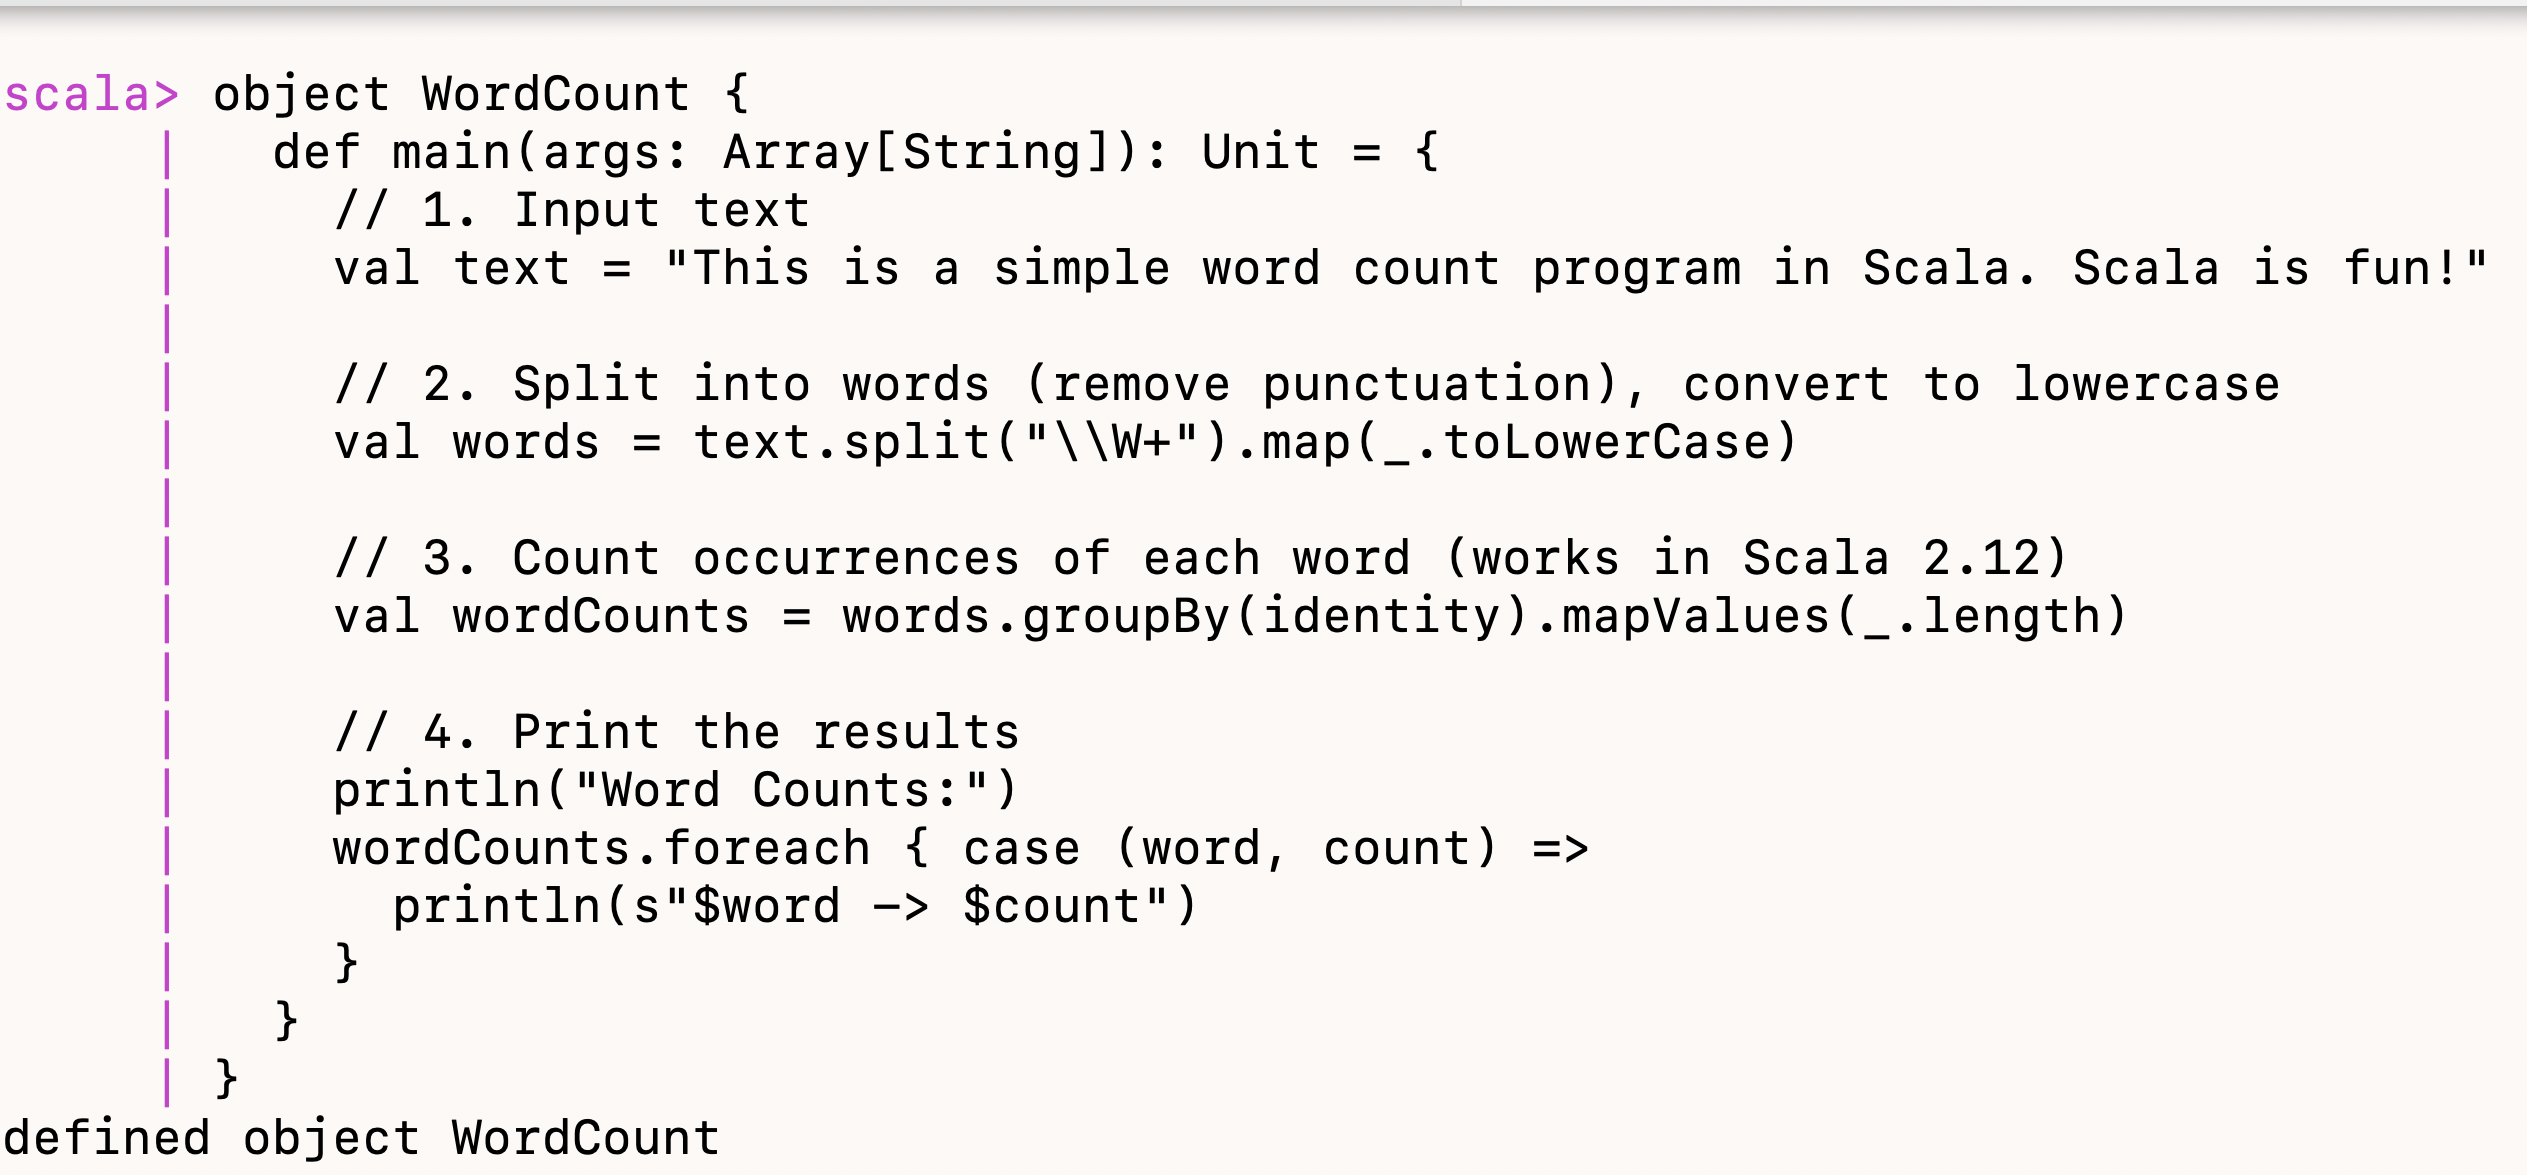

In [4]:
from IPython.display import Image

Image(filename="/Users/vamshikrishnanalla/Desktop/Screenshot 2025-09-05 at 5.13.35 PM.png")

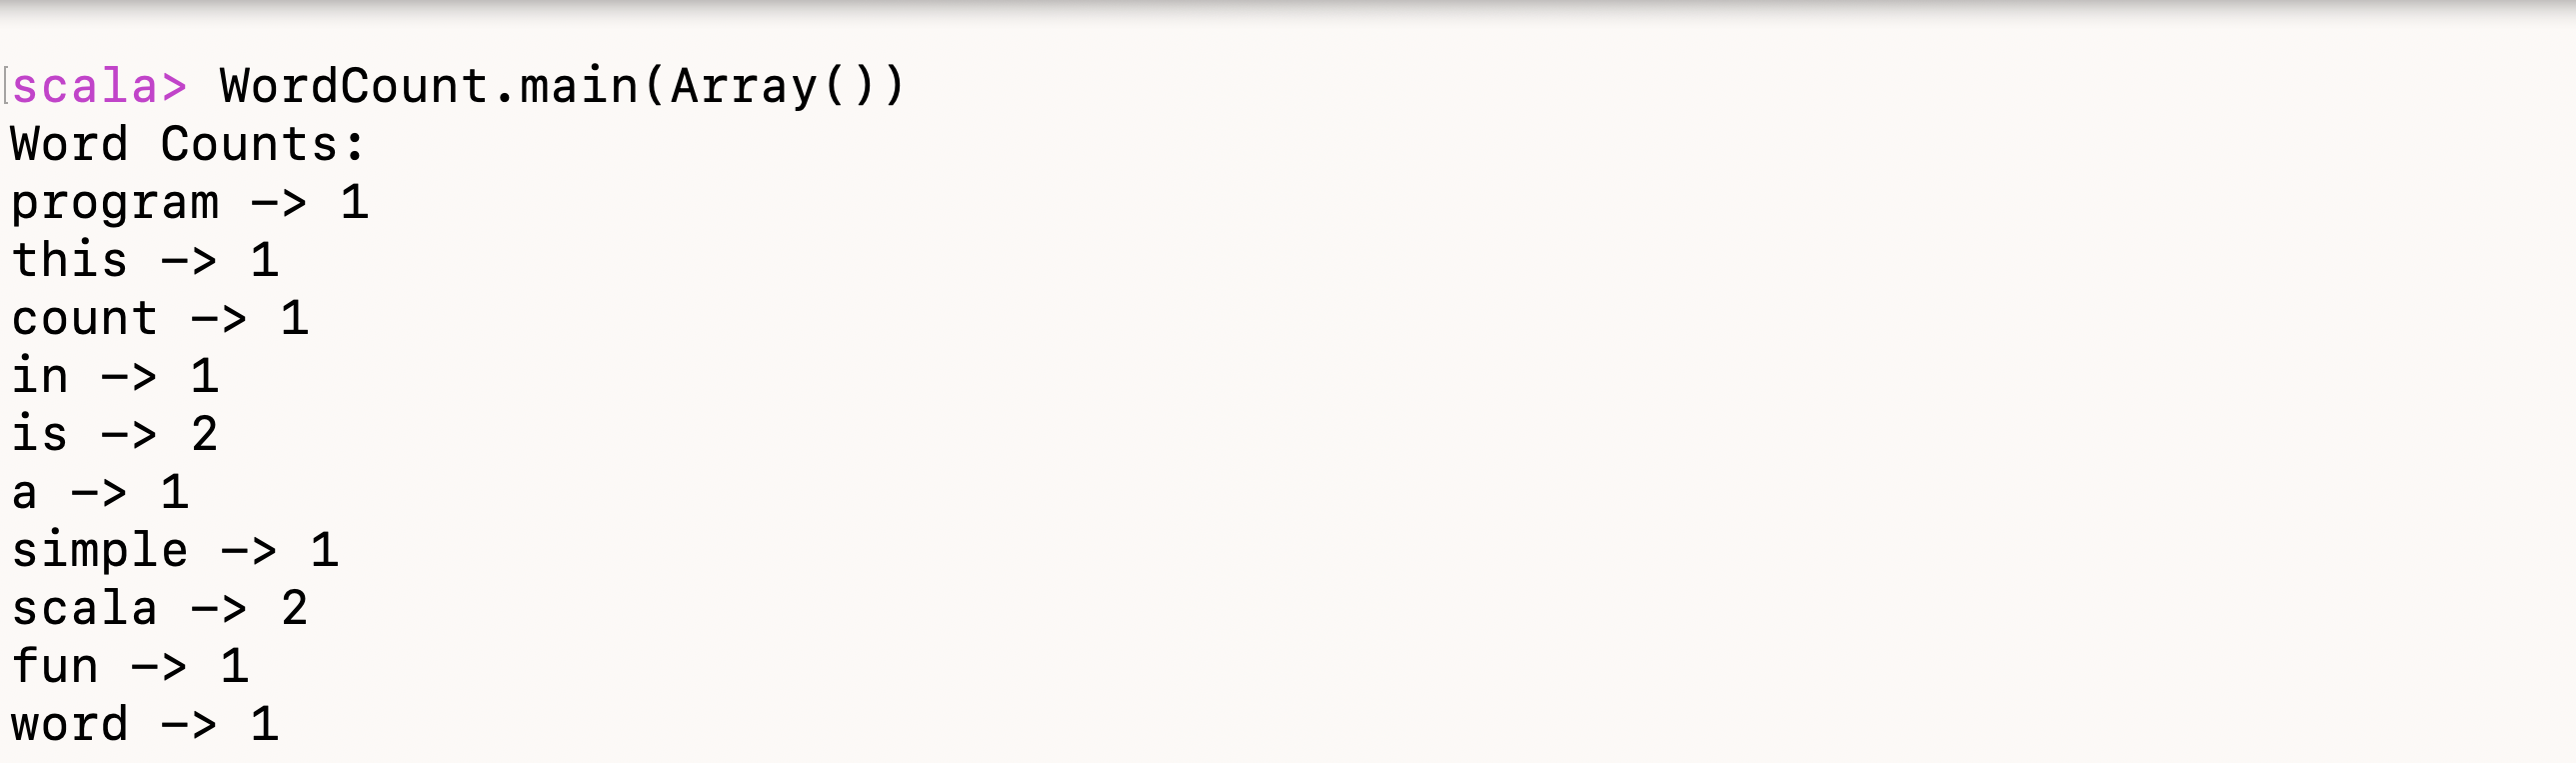

In [5]:
from IPython.display import Image

Image(filename="/Users/vamshikrishnanalla/Desktop/Screenshot 2025-09-05 at 5.13.48 PM.png")